In [35]:
# Comapres the Energy for the QHO Given by KS and TFW

In [36]:
# Imports Modules
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# Define grid and Constants
xmax = 10.0 # Grid Size, x-axes go from -xmax to +xmax
Ng = 200 # Number of Grid Points, determines number of Cells in system
NnMax = 52 # Max Number of states (n = 0, 1, 2, ..., NnMax - 2)
Eks = np.zeros(NnMax, dtype=np.float64) # KS energies
Etf = np.zeros(NnMax, dtype=np.float64) # TF energies
EW = np.zeros(NnMax, dtype=np.float64) # Wiezacker energies
EA = np.zeros(NnMax, dtype=np.float64) # Amadli energies
ED = np.zeros(NnMax, dtype=np.float64) #Dirac energies

LamParam = 1/8 # Constant in front of Weizsacker Correction

# Generates x axis of graph
xAxis = np.arange(0 , NnMax - 1 , 1.0)

In [37]:
# Finds Total and Kinetic KS Energy of the System

def KS_Func(xmax,Ng,Nn):
    import numpy as np
    import matplotlib.pyplot as plt


    
    # Define grid 
    x_g = np.linspace(-xmax, xmax, Ng) # Defines x-coords
    dx = x_g[1] - x_g[0] # Defines setp for change in x
    vext_g = 0.5 * x_g**2  # External potential

    # Generates Matrix for KE Quantum Oppeartor
    T_gg = np.zeros((Ng, Ng))  # Kinetic operator
    for i in range(Ng):
        T_gg[i, i] = -2.0
        if i > 0:
            T_gg[i, i - 1] = 1.0
            T_gg[i - 1, i] = 1.0
    T_gg *= -0.5 / dx**2

    # Initialize density as even:
    n_g = 2.0 * Nn / (Ng * dx) * np.ones(Ng)

    # Nn states, each one doubly occupied.


    density_change_integral = 1.0
    while density_change_integral > 1e-6:
        # Calculate Hamiltonian
        veff_g = vext_g
        H_gg = T_gg + np.diag(veff_g)  # Hamiltonian

        # Solve KS equations
        eps_n, psi_gn = np.linalg.eigh(H_gg) # Outputs energies and corrospoinding wavefunctions

        # Normalize states (states are normalized, but not in our dx metric)
        psi_gn /= np.sqrt(dx)

        # Update density
        nold_g = n_g
        n_g = 2.0 * (psi_gn[:, :Nn]**2).sum(axis=1)
        density_change_integral = np.abs(nold_g - n_g).sum() * dx

        # Ensures that the integral of the density matches the number of electrons in the system
        charge = n_g.sum() * dx
        assert abs(charge - 2.0 * Nn) < 1e-13
        
        # Finds kinetic energy
        Eks = 2.0 * eps_n[:Nn].sum()  # Band structure energy
        Ekin = Eks - (veff_g * n_g).sum() * dx

        # Finds Potential Energy
        Epot = (vext_g * n_g).sum() * dx 
        
        # Finds total energy
        Etot = Ekin + Epot 
        
    # Prints and returns energies and electron density
    print('KS Energy', Ekin)
    return(Ekin, n_g)

In [47]:
# Finds Total and Kinetic Thomas Fermi-Energy

def TF_Solver(xmax, Ng, n_g, LamParam):
    
    import numpy as np
    from numpy import diff # For differentiation of rho 
    from numpy import trapz # To sum areas

        
    x_g = np.linspace(-xmax, xmax, Ng) # Defines x-coords
    dx = x_g[1] - x_g[0] # Defines setp for change in x

    vext_g = 0.5 * x_g**2 # External Potential 
    
    Charge = n_g.sum() * dx # Finds number of electrons

        
    # Generates Thomas-Fermi Energy
    ETFint = (n_g**(5. / 3.)).sum() * dx
    ETF = ETFint * 2.871234
    
    # Calcultes Wiezsacker term
    dRho = np.gradient(n_g,dx) # Calculates grad of the density
    dRhoAbs = (abs(dRho))**2 # Takes absoulute square
    WiezList = (dRhoAbs / n_g).sum() * dx # Divides by density and integrates
    EWiez =  (LamParam * WiezList) # Introduces lambda parameter 
    
    # Calculates Amaldi Correction
    vAmaldi = np.zeros(Ng) # Initilizes matrix for amadli correction
    # Soft Poisson solver to gain Amaldi potential
    for i in range(Ng):
        for j in range(Ng):
            vAmaldi[i] += n_g[j] / np.sqrt(1.0 + (x_g[i] - x_g[j])**2)
    vAmaldi *= dx
    # Provides Amaldi Energy Correction
    EAmaldi = -(1 / (2 * Charge)) * (vAmaldi * n_g).sum() * dx 
    
    #Dirac Correction
    EDirac = (n_g**(4/3)).sum() * dx # performs integral
    EDirac *= -0.7385587664 # Times by constant
    
    
    # Generates Total potential
    Epot = (vext_g * n_g).sum() * dx
    
    # Calculates total kinetic energy
    Ekin = ETF + EWiez + EAmaldi + EDirac


    # Adds kintic and potential energies
    Etot = Ekin + Epot

    
    # Prints and returns total energy
    print('TFW Energy', Ekin)
    return(Ekin, EWiez, EAmaldi, EDirac)


In [49]:
# Runs code for each different number of states
for Nn in range(NnMax):
    if Nn == 0:
        print('No state')
    else:
        print('En = ',Nn - 1) # Prints number of energy level
        
        Eks[Nn], n_g = KS_Func(xmax, Ng, Nn) # Generates lst of KS energies
        Etf[Nn], EW[Nn], EA[Nn], ED[Nn]= TF_Solver(xmax, Ng, n_g, LamParam) # Generates list of TF energies
    # End If
# End For

No state
En =  0
KS Energy 0.500000200026
TFW Energy 3.202114477
En =  1
KS Energy 2.00000200484
TFW Energy 8.34523410003
En =  2
KS Energy 4.50000904245
TFW Energy 14.73664199
En =  3
KS Energy 8.00002739359
TFW Energy 22.0825333158
En =  4
KS Energy 12.5000656231
TFW Energy 30.2183038831
En =  5
KS Energy 18.0001348117
TFW Energy 39.036535341
En =  6
KS Energy 24.5002485887
TFW Energy 48.4606688639
En =  7
KS Energy 32.0004231646
TFW Energy 58.4329055787
En =  8
KS Energy 40.5006773648
TFW Energy 68.9077992342
En =  9
KS Energy 50.0010326635
TFW Energy 79.8485182038
En =  10
KS Energy 60.5015132183
TFW Energy 91.2245050716
En =  11
KS Energy 72.0021459052
TFW Energy 103.009929981
En =  12
KS Energy 84.5029603544
TFW Energy 115.182623993
En =  13
KS Energy 98.0039889866
TFW Energy 127.723317599
En =  14
KS Energy 112.50526705
TFW Energy 140.615081281
En =  15
KS Energy 128.006832657
TFW Energy 153.842904498
En =  16
KS Energy 144.508726824
TFW Energy 167.393372243
En =  17
KS Energy 1

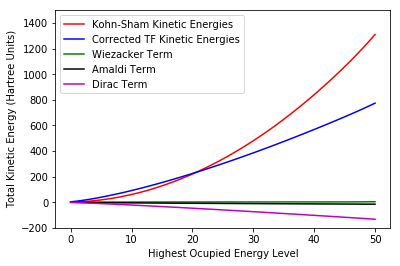

In [52]:
# Draws graph of energies

# Plots TF KS and correction terms (correction terms removed by commenting them out)
plt.plot(xAxis, Eks[1:], color='red', label = 'Kohn-Sham Kinetic Energies') # Plots KS energies
plt.plot(xAxis, Etf[1:], color='b', label = 'Corrected TF Kinetic Energies') # Plots TF energies
plt.plot(xAxis, EW[1:], color='g', label = 'Wiezacker Term') # Plots TF energies
plt.plot(xAxis, EA[1:], color='k', label = 'Amaldi Term') # Plots TF energies
plt.plot(xAxis, ED[1:], color='m', label = 'Dirac Term') # Plots TF energies

# Sets range of y axis
axes = plt.gca()
axes.set_ylim([-200,1500])


plt.legend(loc='upper left')
plt.xlabel('Highest Ocupied Energy Level')
plt.ylabel('Total Kinetic Energy (Hartree Units)')
FileName = 'TF_Full_{0}.png'.format(NnMax - 2)

plt.savefig(FileName)
plt.show()

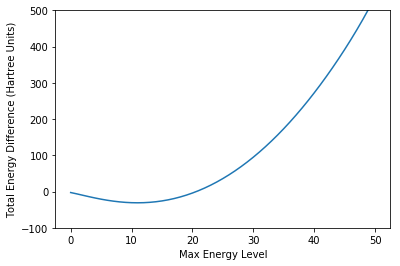

In [42]:
# Finds differecne between KS and TFW energies

Diff = np.zeros(NnMax, dtype=np.float64) # Initilises array
Diff = Eks - Etf # Finds difference at each number of states

plt.plot(xAxis, Diff[1:]) # Plots the difference between models
# Graph labels
plt.xlabel('Max Energy Level')
plt.ylabel('Total Energy Difference (Hartree Units)')

axes = plt.gca()
axes.set_ylim([-100,500])

# Titles graph
Title2 = 'Difference between TFWAD and KS Kinetic Energies for {0} states lambda = {1}'.format(NnMax - 2, LamParam)
#plt.title(Title2)

# Outputs graph to png
FileName = 'TF_Diff_{0}.png'.format(NnMax - 2)
plt.savefig(FileName)

plt.show()

In [26]:
# Calculates avargae error

Error =np.average( (abs(Diff[1:])/Eks[1:]) * 100)

print(Error)


55.5731708453
